In [1]:
import pymongo
import xarray_mongodb
import bson
import datetime

# datetime.datetime.utcnow()

In [74]:
mongoClient = pymongo.MongoClient()
mongoDB = mongoClient.testDB
mongoCollection = mongoDB.testCollection

In [3]:
from time import sleep
from multiprocessing.pool import ThreadPool
 
# task executed in a worker thread
def task():
    # report a message
    print(f'Task executing\n')
    # block for a moment
    sleep(1)
    # report a message
    print(f'Task done\n')
    
def task2():
    # report a message
    print(f'Task2 executing \n')
    # block for a moment
    sleep(1)
    # report a message
    print(f'Task2 done\n')
 
# protect the entry point
if __name__ == '__main__':
    # create and configure the thread pool
    pool = ThreadPool()
    # issue tasks to the thread pool
    pool.apply_async(task)
    pool.apply_async(task2)
    # close the thread pool
    pool.close()
    # wait for all tasks to finish
    pool.join()

Task executing

Task2 executing 

Task2 done

Task done



# Import supporting package

In [4]:
import xarray as xr
import pandas as pd
import numpy as np
import copy

import glob

import xrft
import finufft

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

from datetime import datetime

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from DataContainer.ReadData import read_hdf5_file, read_hdf5_global, read_hdf5_run_time, read_csv_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FFTAnalyser import fft, ifft, fft_nutou
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

# Import supporting package

In [5]:
import xarray as xr
import numpy as np

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

import matplotlib.pyplot as plt

from DataContainer.ReadData import read_hdf5_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FitAnalyser import NewFitModel
from ToolFunction.ToolFunction import *

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

In [71]:
sigma = 8.4743e-14 * 0.5
M = 0.6827
print(1/sigma*5.86e-6**2 / M**2)

1738.8478693742436


In [72]:
5.86e-6/M

8.583565255602754e-06

## Start a client for parallel computing

In [6]:
from dask.distributed import Client
client = Client(n_workers=6, threads_per_worker=10, processes=True, memory_limit='10GB')
client

<Client: 'tcp://127.0.0.1:61431' processes=6 threads=60, memory=55.88 GiB>

## Set global path for experiment

In [7]:
# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/03/0043/*.h5"
# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/04/18/0003/2023-04-18_0003_Evaporative_Cooling_000.h5"

# filepath = "//DyLabNAS/Data/Repetition_scan/2023/04/21/0002/*.h5"

# filepath = r"./testData/0002/*.h5"

# filepath = r"./testData/0002/2023-04-21_0002_Evaporative_Cooling_0.h5"

# filepath = r'd:/Jianshun Gao/Simulations/analyseScripts/testData/0002/2023-04-21_0002_Evaporative_Cooling_0.h5'

# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/04/18/0003/*.h5"

# filepath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/04/0000/*.h5"

filepath = './result_from_experiment/2023-04-24/0013/2023-04-24_0013_Evaporative_Cooling_08.h5'

In [8]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_1",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_2",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_3",
}


In [9]:
img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + '2023/05/23'# get_date()

# An example for one experimental run

## Load the data

In [10]:
shotNum = "0069"
filePath = folderPath + "/" + shotNum + "/*.h5"
# filePath = "//DyLabNAS/Data/Evaporative_Cooling/2023/05/12/0065/*.h5"
filePath = './result_from_experiment/2023-04-24/0013/2023-04-24_0013_Evaporative_Cooling_08.h5'

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in [0] # range(len(groupList))
}

dataSet = dataSetDict["camera_1"]
dataSet = swap_xy(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

dataSet

f:\Jianshun\analyseScript\DataContainer\ReadData.py:178: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not key in datesetOfGlobal.scanAxis


<xarray.Dataset>
Dimensions:     (y: 1200, x: 1920)
Dimensions without coordinates: y, x
Data variables:
    atoms       (y, x) uint16 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
    background  (y, x) uint16 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
    dark        (y, x) uint16 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
    shotNum     <U2 '08'
    OD          (y, x) float64 dask.array<chunksize=(1200, 1920), meta=np.ndarray>
Attributes: (12/96)
    TOF_free:                          0.02
    abs_img_freq:                      110.858
    absorption_imaging_flag:           True
    backup_data:                       True
    blink_off_time:                    nan
    blink_on_time:                     nan
    ...                                ...
    y_offset:                          0
    y_offset_img:                      0
    z_offset:                          0.189
    z_offset_img:                      0.189
    scanAxis:                          []
    scanAxisLength:                    []

In [11]:
list(dataSet.data_vars)

['atoms', 'background', 'dark', 'shotNum', 'OD']

In [14]:
# dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD

<xarray.DataArray 'OD' (y: 300, x: 300)>
array([[-0.06868947, -0.04667641, -0.03211941, ...,  0.01331776,
        -0.01568196, -0.01466019],
       [-0.04738689, -0.10095033, -0.04738689, ..., -0.00086687,
        -0.02864644,  0.04425356],
       [ 0.01488149,  0.02990479,  0.02943848, ...,  0.08614451,
        -0.04168887, -0.17522026],
       ...,
       [-0.04435198, -0.08981436, -0.12101118, ..., -0.03211941,
        -0.10466366, -0.00086687],
       [-0.10622739, -0.16213502, -0.04253957, ..., -0.03117222,
         0.01331776, -0.03117222],
       [-0.02148616, -0.06029029,  0.17348652, ...,  0.04109733,
        -0.07082546, -0.01590475]])
Dimensions without coordinates: y, x
Attributes: (12/107)
    IMAGE_SUBCLASS:                    IMAGE_GRAYSCALE
    IMAGE_VERSION:                     1.2
    IMAGE_WHITE_IS_ZERO:               0
    TOF_free:                          0.02
    abs_img_freq:                      110.858
    absorption_imaging_flag:           True
    ...                                ...
    y_end:                             1025
    y_start:                           725
    x_center:                          960
    y_center:                          875
    x_span:                            300
    y_span:                            300

## Calculate an plot OD images

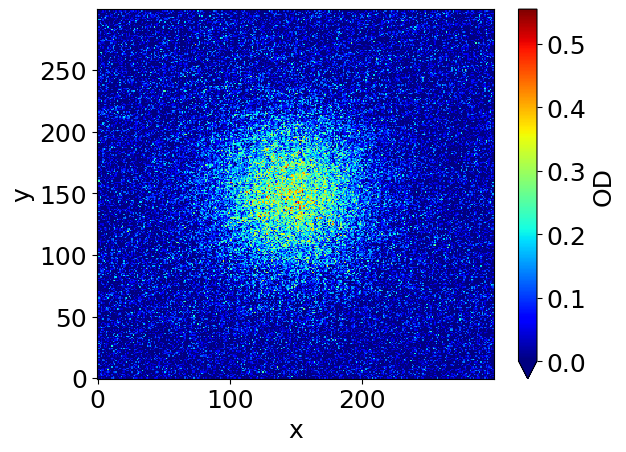

In [13]:
# imageAnalyser.center = (960, 1040)
# imageAnalyser.span = (100, 100)
# imageAnalyser.fraction = (0.1, 0.1)

imageAnalyser.center = (960, 875)
imageAnalyser.span = (300, 300)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

dataSet_cropOD.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])
plt.show()

In [91]:
type(np.array([0]))

numpy.ndarray

In [111]:
name in dataSet.OD.attrs

NameError: name 'name' is not defined

In [131]:
list(dataSet.data_vars)

['atoms', 'background', 'dark', 'shotNum', 'OD']

In [166]:
import pymongo
import xarray_mongodb
import bson
import builtins

from ToolFunction.ToolFunction import get_date


npTypeDict = {v: getattr(builtins, k) for k, v in np.sctypeDict.items() if k in vars(builtins)}
npArrayType = type(np.array([0]))


class MongoDB:
    
    def __init__(self, mongoClient, mongoDB, date=None) -> None:
        self.mongoClient = mongoClient
        self.mongoDB = mongoDB
        self.xdb = xarray_mongodb.XarrayMongoDB(mongoDB)
        
        if date is None:
            date= get_date()
        self.set_date(date)
        
    def _convert_numpy_type(self, data):
        for key in data:
            typeKey = type(data[key])
            if typeKey in npTypeDict:
                data[key] = data[key].item()
            elif typeKey == npArrayType:
                data[key] = data[key].tolist()
            else:
                try:
                    data[key] = data[key].item()
                except:
                    pass
        return data
        
    def set_date(self, date):
        date = date.split("/")
        self.year = int(date[0])
        self.month = int(date[1])
        self.day = int(date[2])
        
    def create_global(self, shotNum, dataSet=None, date=None):
        if not date is None:
            self.set_date(date)
        
        data = {
            'year': self.year,
            'month': self.month,
            'day': self.day,
            'shotNum': shotNum,
            'global_parameters' : {},
        }
        
        global_parameters = self._convert_numpy_type(dataSet.attrs)
        
        if not dataSet is None:
            data['global_parameters'].update(global_parameters)
          
        data = self._convert_numpy_type(data)
        
        self.mongoDB['global'].insert_one(data)
    
    def _add_data_normal(self, shotNum, data):
        filter = {   
            'year': self.year,
            'month': self.month,
            'day': self.day,
            'shotNum': shotNum,
        }
        
        self.mongoDB['global'].update_one(filter, {"$set": data}, upsert=False)
        
    def _add_data_xarray_dataArray(self, shotNum, dataArray):
        filter = {   
            'year': self.year,
            'month': self.month,
            'day': self.day,
            'shotNum': shotNum,
        }
        
        dataArray.attrs = self._convert_numpy_type(dataArray.attrs)
        
        mongoID, _ = self.xdb.put(dataArray)
        
        data_label = {
            dataArray.name: 
                {
                    'name': dataArray.name,
                    'mongoID': mongoID,
                    'engine': 'xarray',
                    'dtype': 'dataArray',
                }
        }
        
        self.mongoDB['global'].update_one(filter, {"$set": data_label}, upsert=False)
    
    def _add_data_xarray_dataSet(self, shotNum, dataSet, name):
        filter = {   
            'year': self.year,
            'month': self.month,
            'day': self.day,
            'shotNum': shotNum,
        }
        
        dataSet.attrs = self._convert_numpy_type(dataSet.attrs)
        
        for key in list(dataSet.data_vars):
            dataSet[key].attrs = self._convert_numpy_type(dataSet[key].attrs)
            print(key)
        
        mongoID, _ = self.xdb.put(dataSet)
        
        data_label = {
            name: 
                {
                    'name': name,
                    'mongoID': mongoID,
                    'engine': 'xarray',
                    'dtype': 'dataSet',
                }
        }
        
        self.mongoDB['global'].update_one(filter, {"$set": data_label}, upsert=False)
    
    def _add_data_additional(self, shotNum, data, name):
        filter = {   
            'year': self.year,
            'month': self.month,
            'day': self.day,
            'shotNum': shotNum,
        }
        
        mongoID = self.mongoDB.additional.insert_one(data).inserted_id
        
        data_label = {
            name: 
                {
                    'name': name,
                    'mongoID': mongoID,
                    'engine': 'additional',
                    'dtype': 'dict',
                }
        }
        
        self.mongoDB['global'].update_one(filter, {"$set": data_label}, upsert=False)
        
    def add_data(self, shotNum, data, date=None, name=None, engine='normal'):
        if not date is None:
            self.set_date(date)
            
        if engine == 'normal':
            self._add_data_normal(shotNum=shotNum, data=data)
        elif engine == 'xarray':
            if isinstance(data, type(xr.Dataset())):
                self._add_data_xarray_dataSet(shotNum=shotNum, data=data, name=name)
            else:
                self._add_data_xarray_dataArray(shotNum=shotNum, data=data, name=name)
        elif engine == 'additional':
            self._add_data_additional(shotNum=shotNum, data=data, name=name)
    
    def read_global(self, shotNum, date=None):
        
        if not date is None:
            self.set_date(date)
        
        filter = {   
            'year': self.year,
            'month': self.month,
            'day': self.day,
            'shotNum': shotNum,
        }
        
        return self.mongoDB['global'].find_one(filter)
    
    def _load_data_single(self, mongoID, engine):
        if engine == 'xarray':
            return self.xdb.get(mongoID)
        if engine == 'additional':
            return self.mongoDB.additional.find_one({'_id': mongoID})
    
    def load_data_single(self, shotNum=None, globalDict=None, date=None, field=None):
        
        if not date is None:
            self.set_date(date)
        
        if globalDict is None:
            globalDict = self.read_global(shotNum)
        
        if field is None:
            field = globalDict
        
        res = {}
        
        for key in field:
            if isinstance(globalDict[key], dict) and ('mongoID' in globalDict[key]):
                mongoID = globalDict[key]['mongoID']
                engine = globalDict[key]['engine']
                
                res.update(
                    {
                        key: self._load_data_single(mongoID=mongoID, engine=engine)
                    }
                )
                
        return res
                
    def load_data(self, shotNum=None, globalDict=None, date=None, field=None):
        pass
    
DB = MongoDB(mongoClient, mongoDB, date='2023/05/23')

In [169]:
res = DB.load_data_single(shotNum='0069', field=['test'])
res

{'test': {'_id': ObjectId('6486e8ed129ec5a1a24a737a'), 'test': 10}}

In [170]:
data = {
    'test':100
}
DB._add_data_additional(shotNum, data, name='test')

In [126]:
DB._add_data_xarray_dataArray(shotNum, dataSet_cropOD)

In [148]:
test = DB._convert_numpy_type(dataSet.OD.attrs)

type(test['IMAGE_WHITE_IS_ZERO'])

int

In [147]:
type(dataSet.OD.attrs['IMAGE_WHITE_IS_ZERO'])

numpy.uint8

In [149]:
DB._add_data_xarray_dataSet(shotNum, dataSet, 'aaa')

atoms
background
dark
shotNum
OD


In [122]:
xdb.put(dataSet_cropOD)

(ObjectId('64835527129ec5a1a24a7369'), None)

In [125]:
DB.create_global(shotNum, dataSet)

## Do a 2D two-peak gaussian fit to the OD images

### Do the fit

In [ ]:
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, polylog2_2d

fitModel = DensityProfileBEC2dModel()
# fitModel = ThomasFermi2dModel()

fitAnalyser = FitAnalyser(fitModel, fitDim=2)

# fitAnalyser = FitAnalyser("Gaussian-2D", fitDim=2)

# dataSet_cropOD = dataSet_cropOD.chunk((1,1,100,100))

params = fitAnalyser.guess(dataSet_cropOD, guess_kwargs=dict(pureBECThreshold=0.3), dask="parallelized")
fitResult = fitAnalyser.fit(dataSet_cropOD, params).load()

In [ ]:
params.compute().item()

In [ ]:
fitCurve = fitAnalyser.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

In [ ]:
fitModel2 = Polylog22dModel(prefix='thermal_')
fitAnalyser2 = FitAnalyser(fitModel2, fitDim=2)
fitCurve2 = fitAnalyser2.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

fitModel3 = ThomasFermi2dModel(prefix='BEC_')
fitAnalyser3 = FitAnalyser(fitModel3, fitDim=2)
fitCurve3 = fitAnalyser3.eval(fitResult, x=np.arange(300), y=np.arange(300), dask="parallelized").load()

In [ ]:
fig = plt.figure()
ax = fig.gca()

dataSet_cropOD.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve2.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve3.sum(dim='x').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])

plt.show()

fig = plt.figure()
ax = fig.gca()

dataSet_cropOD.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve2.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])
fitCurve3.sum(dim='y').plot(ax=ax, col=scanAxis[0], row=scanAxis[1])

plt.show()

In [ ]:
value = fitAnalyser.get_fit_value(fitResult)
std = fitAnalyser.get_fit_std(fitResult)

In [ ]:
fitResult.item()

In [ ]:
value

# upload data to MongoDB

In [121]:
xdb = xarray_mongodb.XarrayMongoDB(mongoDB)

In [ ]:
value = fitAnalyser.get_fit_value(fitResult)
value

In [ ]:
dataSet_cropOD

In [ ]:
dataSet_cropOD.attrs['name'] = 'name'

In [40]:
dataSet_cropOD.attrs['IMAGE_WHITE_IS_ZERO']

numpy.uint8

In [41]:
dataSet_cropOD

<xarray.DataArray 'OD' (y: 300, x: 300)>
array([[-0.06868947, -0.04667641, -0.03211941, ...,  0.01331776,
        -0.01568196, -0.01466019],
       [-0.04738689, -0.10095033, -0.04738689, ..., -0.00086687,
        -0.02864644,  0.04425356],
       [ 0.01488149,  0.02990479,  0.02943848, ...,  0.08614451,
        -0.04168887, -0.17522026],
       ...,
       [-0.04435198, -0.08981436, -0.12101118, ..., -0.03211941,
        -0.10466366, -0.00086687],
       [-0.10622739, -0.16213502, -0.04253957, ..., -0.03117222,
         0.01331776, -0.03117222],
       [-0.02148616, -0.06029029,  0.17348652, ...,  0.04109733,
        -0.07082546, -0.01590475]])
Dimensions without coordinates: y, x
Attributes: (12/107)
    IMAGE_SUBCLASS:                    IMAGE_GRAYSCALE
    IMAGE_VERSION:                     1.2
    IMAGE_WHITE_IS_ZERO:               0
    TOF_free:                          0.02
    abs_img_freq:                      110.858
    absorption_imaging_flag:           True
    ...                                ...
    y_end:                             1025
    y_start:                           725
    x_center:                          960
    y_center:                          875
    x_span:                            300
    y_span:                            300

In [57]:
type(dataSet_cropOD.attrs['absorption_imaging_flag'].item())

bool

In [46]:
del dataSet_cropOD.attrs['IMAGE_WHITE_IS_ZERO']

In [58]:
import builtins
npTypeDict = {v: getattr(builtins, k) for k, v in np.typeDict.items() if k in vars(builtins)}

for key in dataSet_cropOD.attrs:
    typeKey = type(dataSet_cropOD.attrs[key])
    if typeKey in npTypeDict:
        dataSet_cropOD.attrs[key] = dataSet_cropOD.attrs[key].item()

C:\Users\data\AppData\Local\Temp\ipykernel_13060\1656438333.py:2: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  npTypeDict = {v: getattr(builtins, k) for k, v in np.typeDict.items() if k in vars(builtins)}


In [55]:
import builtins
a = {v: getattr(builtins, k) for k, v in np.typeDict.items() if k in vars(builtins)}
a
a[type(dataSet_cropOD.attrs['absorption_imaging_flag'])]

C:\Users\data\AppData\Local\Temp\ipykernel_13060\3602545102.py:2: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  a = {v: getattr(builtins, k) for k, v in np.typeDict.items() if k in vars(builtins)}


{numpy.int32: int,
 numpy.float64: float,
 numpy.complex128: complex,
 numpy.bool_: bool,
 numpy.object_: object,
 numpy.str_: str,
 numpy.bytes_: bytes}

In [59]:
_id, _ = xdb.put(dataSet_cropOD)

In [61]:
_id

ObjectId('6482fb08129ec5a1a24a734f')

In [ ]:
# _id = '646e3cbbdb91e17db4b4cbd2'

In [62]:
xdb.get(_id)

<xarray.DataArray 'OD' (y: 300, x: 300)>
array([[-0.06868947, -0.04667641, -0.03211941, ...,  0.01331776,
        -0.01568196, -0.01466019],
       [-0.04738689, -0.10095033, -0.04738689, ..., -0.00086687,
        -0.02864644,  0.04425356],
       [ 0.01488149,  0.02990479,  0.02943848, ...,  0.08614451,
        -0.04168887, -0.17522026],
       ...,
       [-0.04435198, -0.08981436, -0.12101118, ..., -0.03211941,
        -0.10466366, -0.00086687],
       [-0.10622739, -0.16213502, -0.04253957, ..., -0.03117222,
         0.01331776, -0.03117222],
       [-0.02148616, -0.06029029,  0.17348652, ...,  0.04109733,
        -0.07082546, -0.01590475]])
Dimensions without coordinates: y, x
Attributes: (12/105)
    IMAGE_SUBCLASS:                    IMAGE_GRAYSCALE
    IMAGE_VERSION:                     1.2
    TOF_free:                          0.02
    abs_img_freq:                      110.858
    absorption_imaging_flag:           True
    backup_data:                       True
    ...                                ...
    y_end:                             1025
    y_start:                           725
    x_center:                          960
    y_center:                          875
    x_span:                            300
    y_span:                            300

In [ ]:
c = bson.objectid.ObjectId('646e4919802812f029b385d7')
c

In [ ]:
xdb.get(c)

In [63]:
import datetime
post = {"author": "Mike",
        "data_id": _id,
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow(),
        }


In [64]:
posts = mongoCollection
post_id = posts.insert_one(post).inserted_id
post_id

ObjectId('648318ae129ec5a1a24a7353')

In [94]:
posts.find_one({'_id': bson.objectid.ObjectId('648318ae129ec5a1a24a7353')})

{'_id': ObjectId('648318ae129ec5a1a24a7353'),
 'author': 'Mike',
 'data_id': ObjectId('6482fb08129ec5a1a24a734f'),
 'tags': ['mongodb', 'python', 'pymongo'],
 'date': datetime.datetime(2023, 6, 9, 12, 18, 52, 771000),
 'test': DBRef('xarray.meta', ObjectId('6482f4a3129ec5a1a24a7342'), 'testDB')}

In [67]:
for i in posts.find_one({'_id': bson.objectid.ObjectId('648318ae129ec5a1a24a7353')}):
    bb = i
    
bb['test']

DBRef('xarray.meta', ObjectId('6482f4a3129ec5a1a24a7342'), 'testDB')

In [15]:
import gridfs

fs = gridfs.GridFS(mongoDB, 'xarray')

In [19]:
f = dataSet_cropOD.to_dict()
f

{'dims': ('y', 'x'),
 'attrs': {'IMAGE_SUBCLASS': 'IMAGE_GRAYSCALE',
  'IMAGE_VERSION': '1.2',
  'IMAGE_WHITE_IS_ZERO': 0,
  'TOF_free': 0.02,
  'abs_img_freq': 110.858,
  'absorption_imaging_flag': True,
  'backup_data': True,
  'blink_off_time': nan,
  'blink_on_time': nan,
  'c_duration': 0.2,
  'cmot_final_current': 0.65,
  'cmot_hold': 0.06,
  'cmot_initial_current': 0.18,
  'compX_current': 0.005,
  'compX_current_sg': 0,
  'compX_final_current': 0.005,
  'compX_initial_current': 0.005,
  'compY_current': 0,
  'compY_current_sg': 0,
  'compY_final_current': 0.0,
  'compY_initial_current': 0,
  'compZ_current': 0,
  'compZ_current_sg': 0.189,
  'compZ_final_current': 0.2812,
  'compZ_initial_current': 0,
  'default_camera': 0,
  'evap_1_arm_1_final_pow': 0.35,
  'evap_1_arm_1_mod_depth_final': 0,
  'evap_1_arm_1_mod_depth_initial': 1.0,
  'evap_1_arm_1_mod_ramp_duration': 1.15,
  'evap_1_arm_1_pow_ramp_duration': 1.65,
  'evap_1_arm_1_start_pow': 7,
  'evap_1_arm_2_final_pow': 5,


In [26]:
print(ff)

{"dims": ["y", "x"], "attrs": {"IMAGE_SUBCLASS": "IMAGE_GRAYSCALE", "IMAGE_VERSION": "1.2", "IMAGE_WHITE_IS_ZERO": 0, "TOF_free": 0.02, "abs_img_freq": 110.858, "absorption_imaging_flag": true, "backup_data": true, "blink_off_time": NaN, "blink_on_time": NaN, "c_duration": 0.2, "cmot_final_current": 0.65, "cmot_hold": 0.06, "cmot_initial_current": 0.18, "compX_current": 0.005, "compX_current_sg": 0, "compX_final_current": 0.005, "compX_initial_current": 0.005, "compY_current": 0, "compY_current_sg": 0, "compY_final_current": 0.0, "compY_initial_current": 0, "compZ_current": 0, "compZ_current_sg": 0.189, "compZ_final_current": 0.2812, "compZ_initial_current": 0, "default_camera": 0, "evap_1_arm_1_final_pow": 0.35, "evap_1_arm_1_mod_depth_final": 0, "evap_1_arm_1_mod_depth_initial": 1.0, "evap_1_arm_1_mod_ramp_duration": 1.15, "evap_1_arm_1_pow_ramp_duration": 1.65, "evap_1_arm_1_start_pow": 7, "evap_1_arm_2_final_pow": 5, "evap_1_arm_2_ramp_duration": 0.5, "evap_1_arm_2_start_pow": 0, "

In [27]:
import json
ff = json.dumps(f) 
fs.put(ff, encoding='utf-8')

ObjectId('6482f4a3129ec5a1a24a7342')

In [ ]:
fs.put(b"hello world")

In [29]:
c = bson.objectid.ObjectId('6482f4a3129ec5a1a24a7342')

fs.get(c)

In [30]:
print(fs.get(c))

In [ ]:
np.sqrt(np.sum([0.061**2, 0.334**2, 0.447**2]))